# Clustering con Dataset IRIS

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# =========================================
# 1) Datos
# =========================================
df = pd.read_csv("iris.csv")

# Selección de variables (pueden ser >3)
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
X = df[features].to_numpy()

# Escalado (muy importante)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [16]:
# =========================================
# 2) Barrido de k
# =========================================
max_k = min(8, len(df) - 1)
ks = range(2, max_k + 1)
sse = []
sils = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_scaled)
    sse.append(model.inertia_)
    sils.append(silhouette_score(X_scaled, labels))


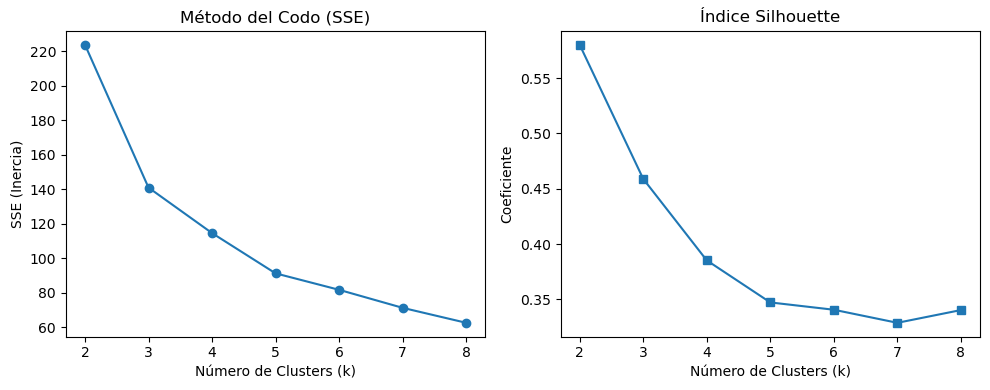

In [17]:
# =========================================
# 3) Gráficos de evaluación
# =========================================
plt.figure(figsize=(10,4))

# (a) Método del Codo
plt.subplot(1,2,1)
plt.plot(ks, sse, "o-")
plt.title("Método del Codo (SSE)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("SSE (Inercia)")

# (b) Silhouette
plt.subplot(1,2,2)
plt.plot(ks, sils, "s-")
plt.title("Índice Silhouette")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Coeficiente")

plt.tight_layout()
plt.show()


In [18]:
# =========================================
# 4) Selección automática (máx silhouette)
# =========================================
best_k = ks[np.argmax(sils)]
print(f"Mejor k sugerido (por Silhouette): {best_k}")


Mejor k sugerido (por Silhouette): 2


In [19]:
# =========================================
# 5) Modelo final
# =========================================
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = final_kmeans.fit_predict(X_scaled)
df["Cluster"] = labels
centroids = scaler.inverse_transform(final_kmeans.cluster_centers_)

#print("Tamaño por clúster:", df["Cluster"].value_counts().sort_index().to_dict())
#for i, (e, inc) in enumerate(centroids):
#    print(f"Centroide_{i}: Edad={e:.1f}, Ingreso (miles S/)={inc:.1f}")
centroids

array([[6.262, 2.872, 4.906, 1.676],
       [5.006, 3.418, 1.464, 0.244]])

In [20]:
# =========================================
# 6) PCA para visualización
# =========================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Agregar componentes principales al DataFrame
df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]

# Centroides en espacio PCA
centroids_pca = []
for i in range(best_k):
    cluster_points = X_pca[labels == i]
    centroids_pca.append(cluster_points.mean(axis=0))
centroids_pca = np.array(centroids_pca)

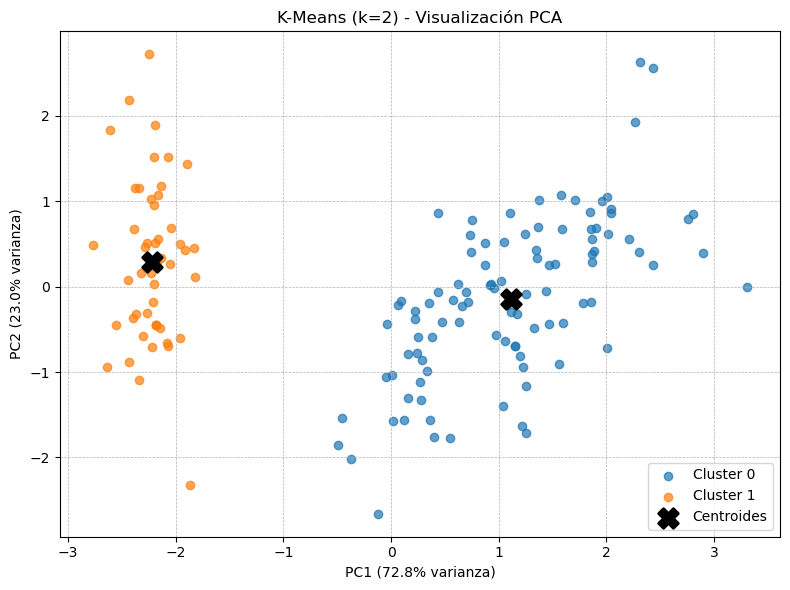

In [ ]:
# =========================================
# 7) Gráfico con PCA
# =========================================
plt.figure(figsize=(8, 6))
for lab in np.unique(labels):
    m = labels == lab
    plt.scatter(df.loc[m, "PC1"], df.loc[m, "PC2"], label=f"Cluster {lab}", alpha=0.7)

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
           marker="X", s=200, c='black', linewidths=2, label="Centroides")

plt.title(f"K-Means (k={best_k}) - Visualización PCA")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
# =========================================
# 8) Reporte final
# =========================================
print(f"Silhouette (k={best_k}): {silhouette_score(X_scaled, labels):.3f}")
print("Tamaño por clúster:", df["Cluster"].value_counts().sort_index().to_dict())
print(f"Varianza explicada por PCA: {pca.explained_variance_ratio_.sum()*100:.1f}%")

Silhouette (k=2): 0.580
Tamaño por clúster: {0: 100, 1: 50}
Varianza explicada por PCA: 95.8%
